In [1]:
import torch
from torchvision import transforms
from PIL import Image
import torchvision
from dataset import ImagesWithSaliency
from torchvision.io import read_image
import matplotlib.pyplot as plt

In [9]:
kl_loss = torch.nn.KLDivLoss(reduction="batchmean", log_target=True)

In [12]:
input = torch.log_softmax(torch.randn(3, 224*224), dim=1)
target = torch.log_softmax(torch.rand(3, 224*224), dim=1)

In [13]:
kl_loss(input, target)

tensor(0.5409)

In [21]:
transform = transforms.Compose([
    transforms.Resize((512,512)),
    transforms.Lambda(lambda x: x/255)
    ])

In [22]:
dataset = ImagesWithSaliency("./SaliencyChartQA/raw_img/", "./SaliencyChartQA/heatmaps/", transform, transform)

In [12]:
image = Image.open('./SaliencyChartQA/raw_img/00108924006058.png')
a = transform(image)

In [14]:
torch.max(a)

tensor(1.)

In [1]:
from transformers import AutoTokenizer, BertModel

/home/v/mambaforge/envs/saliency/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello, my dog dong dog dong ds dsa ds is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [48]:
model.config.hidden_size

768

In [36]:
last_hidden_states.shape

torch.Size([1, 15, 768])

In [3]:
a = "two_col_102995_What is the average of UK, Germany and France?.png"
id = "two_col_102995"

In [13]:
a = read_image("./SaliencyChartQA/raw_img/00108924006058.png")

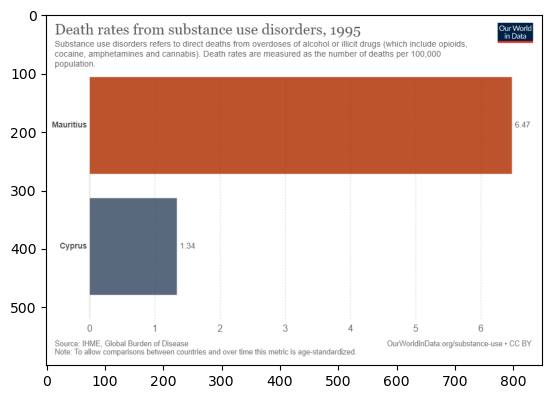

In [54]:
plt.imshow(a[:-1].permute(1,2,0))

In [6]:
a.replace(f"{id}_", "").replace(".png", "")

'What is the average of UK, Germany and France?'

In [46]:
src = torch.rand((1,3, 224, 224))

In [3]:
import transformers

In [40]:
config = transformers.ViTConfig()

In [44]:
config.hidden_size

768

In [6]:
model = transformers.ViTModel(config)

In [8]:
type(model)

transformers.models.vit.modeling_vit.ViTModel

In [86]:
out = model.forward(src, return_dict =True)

In [64]:
query = torch.rand((1, 13,768))
key = torch.rand((1, 197,768))
value = key

In [69]:
up = torch.nn.Upsample(11, mode='linear')

In [70]:
up(query.permute(0,2,1)).shape

torch.Size([1, 768, 11])

In [38]:
multihead_attn = torch.nn.MultiheadAttention(768, 12, batch_first=True)
attn_output, attn_output_weights = multihead_attn(query, key, value)

In [39]:
attn_output.shape

torch.Size([1, 13, 768])

In [12]:
from transformers import ViTModel, AutoImageProcessor

In [3]:
vit = ViTModel.from_pretrained("google/vit-large-patch16-224")

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-large-patch16-224 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
img = torch.randn((1, 3, 224, 224))

In [9]:
b = vit.forward(img, return_dict =True)["last_hidden_state"]

In [10]:
b.shape

torch.Size([1, 197, 1024])

In [13]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

In [14]:
image_processor

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}